In [3]:
!pip install mlxtend

In [4]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\dell\anaconda3\lib\site-packages (2.9.0)


In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn import utils
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier, StackingCVClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

#plt.rc("font", size=100)
#plt.rcParams["figure.figsize"] = (20,20)

In [3]:
train = pd.read_csv("train.csv")

In [7]:
test = pd.read_csv("test.csv")

In [8]:
train

mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0       6930.90     2919.02       0.42116      51.8298  9.888294e+05   
1      15635.70     4879.36       0.31206     223.5500  2.058426e+06   
2      10376.20     2613.88       0.25191     127.3370  1.434676e+06   
3      13093.80     4510.06       0.34444     155.4400  1.812195e+06   
4       7545.21     2882.36       0.38201      85.1237  1.043918e+06   
...         ...         ...           ...          ...           ...   
9141    7250.25     3120.63       0.43041      82.0410  9.794768e+05   
9142   10145.00     3544.90       0.34942      90.1403  1.374393e+06   
9143    8086.10     1621.65       0.20054      78.5118  1.134257e+06   
9144   14418.90     6373.71       0.44203      84.0665  1.955398e+06   
9145    6852.61     1584.64       0.23124      51.3211  9.559976e+05   

      std_dev_malign  err_malign  malign_penalty  damage_ratio  tumor_size  
0           109.4870     2758.76              72       39.3620      14.103  
1           248.8810     5952.53             240       22.0253       2.648  
2           160.0930     4635.26              73       29.9963       1.688  
3           173.0150     5273.87              32       28.1354       3.796  
4           124.4140     3263.35              57       35.0200      18.023  
...              ...         ...             ...           ...         ...  
9141        118.7710     3370.24              53       37.0260      13.127  
9142        154.0270     5025.50              30       31.0565      17.091  
9143        104.2840     3804.98              13       34.2739       1.971  
9144        246.4450    19881.74              39       34.5885      17.749  
9145         80.6543     3073.51              28       37.8939      14.103  

[9146 rows x 10 columns]

In [9]:
test

mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0        4946.44      914.06       0.18479      54.5566  6.628345e+05   
1        5613.85     1629.12       0.29019      51.5524  7.842271e+05   
2       12421.10     3062.41       0.24654     154.1560  1.763575e+06   
3        6830.77     2457.66       0.35979      56.8995  9.296623e+05   
4       33407.80    12353.60       0.36978     219.0740  4.595871e+06   
...          ...         ...           ...          ...           ...   
36579   16301.90     4967.74       0.30473     210.0270  2.130257e+06   
36580    8111.15     1910.59       0.23555      70.8298  1.149657e+06   
36581   13554.10     3963.33       0.29240     144.6260  1.815171e+06   
36582    5764.68     1117.16       0.19379      54.9415  7.784623e+05   
36583    4419.05      840.74       0.19025      45.5905  5.966973e+05   

       std_dev_malign  err_malign  malign_penalty  damage_ratio  
0             67.0525     2301.76              22       41.9554  
1             80.1986     3235.00              48       40.7410  
2            186.8590     4684.63              63       29.4778  
3             92.7361     3211.93              42       38.5027  
4            493.3370    13389.36             187       26.8449  
...               ...         ...             ...           ...  
36579        267.5270     6307.85             254       21.6586  
36580         88.9296     3051.35              63       39.0947  
36581        201.7690     4781.60              56       30.8800  
36582         73.3862     2505.60              27       41.0372  
36583         65.1221     2588.04              11       46.5464  

[36584 rows x 9 columns]

In [10]:
train.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [11]:
test.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
dtype: int64

In [12]:
train.corr()

mass_npea  size_npear  malign_ratio  damage_size  \
mass_npea        1.000000    0.907335      0.123411     0.930691   
size_npear       0.907335    1.000000      0.499398     0.794096   
malign_ratio     0.123411    0.499398      1.000000     0.029167   
damage_size      0.930691    0.794096      0.029167     1.000000   
exposed_area     0.998167    0.903502      0.119389     0.925266   
std_dev_malign   0.968006    0.907932      0.196430     0.938202   
err_malign       0.617207    0.570343      0.081228     0.535834   
malign_penalty   0.654849    0.593019      0.102475     0.676904   
damage_ratio    -0.901106   -0.791768     -0.068605    -0.892006   
tumor_size      -0.004679    0.164761      0.374273    -0.163804   

                exposed_area  std_dev_malign  err_malign  malign_penalty  \
mass_npea           0.998167        0.968006    0.617207        0.654849   
size_npear          0.903502        0.907932    0.570343        0.593019   
malign_ratio        0.119389        0.196430    0.081228        0.102475   
damage_size         0.925266        0.938202    0.535834        0.676904   
exposed_area        1.000000        0.962462    0.617149        0.646444   
std_dev_malign      0.962462        1.000000    0.597842        0.667264   
err_malign          0.617149        0.597842    1.000000        0.381454   
malign_penalty      0.646444        0.667264    0.381454        1.000000   
damage_ratio       -0.900717       -0.884481   -0.583945       -0.646893   
tumor_size         -0.003641       -0.030085    0.004484        0.011871   

                damage_ratio  tumor_size  
mass_npea          -0.901106   -0.004679  
size_npear         -0.791768    0.164761  
malign_ratio       -0.068605    0.374273  
damage_size        -0.892006   -0.163804  
exposed_area       -0.900717   -0.003641  
std_dev_malign     -0.884481   -0.030085  
err_malign         -0.583945    0.004484  
malign_penalty     -0.646893    0.011871  
damage_ratio        1.000000    0.054892  
tumor_size          0.054892    1.000000

In [13]:
#Variance Inflation Factor for train Data
X1 = train.select_dtypes(include = np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns

vif_data["VIF"] = [variance_inflation_factor(X1.values,i)
                          for i in range(len(X1.columns))]

print(vif_data)

          Feature          VIF
0       mass_npea  2800.542677
1      size_npear   176.897405
2    malign_ratio   127.776099
3     damage_size    68.581714
4    exposed_area  2101.967409
5  std_dev_malign   135.566627
6      err_malign     9.922600
7  malign_penalty     5.013300
8    damage_ratio    72.612187
9      tumor_size     3.668093


In [14]:
X = train["mass_npea"]
y = train["size_npear"]

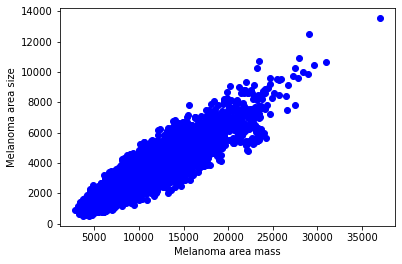

In [15]:
plt.scatter(X,y,color = "blue",marker = 'o')
plt.xlabel("Melanoma area mass")
plt.ylabel("Melanoma area size")
plt.show()

In [16]:
z = train["tumor_size"]

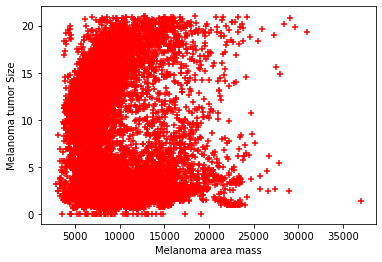

In [17]:
plt.scatter(X,z,color = "red",marker = '+')
plt.xlabel("Melanoma area mass")
plt.ylabel("Melanoma tumor Size")
plt.show()

In [18]:
b = train["malign_ratio"]

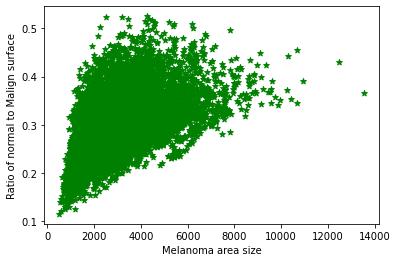

In [19]:
plt.scatter(y,b,color = 'green', marker ='*')
plt.xlabel("Melanoma area size")
plt.ylabel("Ratio of normal to Malign surface")
plt.show()

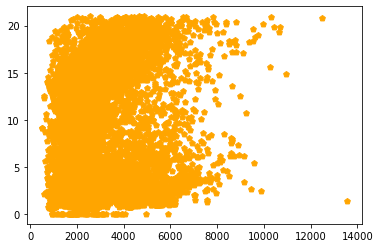

In [20]:
plt.scatter(y,z,color = 'orange', marker ='p')
plt.show()

In [21]:
train.shape

(9146, 10)

In [22]:
test.shape

(36584, 9)

In [23]:
train["source"] = "train"
test["source"] = "test"

In [24]:
test

mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0        4946.44      914.06       0.18479      54.5566  6.628345e+05   
1        5613.85     1629.12       0.29019      51.5524  7.842271e+05   
2       12421.10     3062.41       0.24654     154.1560  1.763575e+06   
3        6830.77     2457.66       0.35979      56.8995  9.296623e+05   
4       33407.80    12353.60       0.36978     219.0740  4.595871e+06   
...          ...         ...           ...          ...           ...   
36579   16301.90     4967.74       0.30473     210.0270  2.130257e+06   
36580    8111.15     1910.59       0.23555      70.8298  1.149657e+06   
36581   13554.10     3963.33       0.29240     144.6260  1.815171e+06   
36582    5764.68     1117.16       0.19379      54.9415  7.784623e+05   
36583    4419.05      840.74       0.19025      45.5905  5.966973e+05   

       std_dev_malign  err_malign  malign_penalty  damage_ratio source  
0             67.0525     2301.76              22       41.9554   test  
1             80.1986     3235.00              48       40.7410   test  
2            186.8590     4684.63              63       29.4778   test  
3             92.7361     3211.93              42       38.5027   test  
4            493.3370    13389.36             187       26.8449   test  
...               ...         ...             ...           ...    ...  
36579        267.5270     6307.85             254       21.6586   test  
36580         88.9296     3051.35              63       39.0947   test  
36581        201.7690     4781.60              56       30.8800   test  
36582         73.3862     2505.60              27       41.0372   test  
36583         65.1221     2588.04              11       46.5464   test  

[36584 rows x 10 columns]

In [25]:
train

mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0       6930.90     2919.02       0.42116      51.8298  9.888294e+05   
1      15635.70     4879.36       0.31206     223.5500  2.058426e+06   
2      10376.20     2613.88       0.25191     127.3370  1.434676e+06   
3      13093.80     4510.06       0.34444     155.4400  1.812195e+06   
4       7545.21     2882.36       0.38201      85.1237  1.043918e+06   
...         ...         ...           ...          ...           ...   
9141    7250.25     3120.63       0.43041      82.0410  9.794768e+05   
9142   10145.00     3544.90       0.34942      90.1403  1.374393e+06   
9143    8086.10     1621.65       0.20054      78.5118  1.134257e+06   
9144   14418.90     6373.71       0.44203      84.0665  1.955398e+06   
9145    6852.61     1584.64       0.23124      51.3211  9.559976e+05   

      std_dev_malign  err_malign  malign_penalty  damage_ratio  tumor_size  \
0           109.4870     2758.76              72       39.3620      14.103   
1           248.8810     5952.53             240       22.0253       2.648   
2           160.0930     4635.26              73       29.9963       1.688   
3           173.0150     5273.87              32       28.1354       3.796   
4           124.4140     3263.35              57       35.0200      18.023   
...              ...         ...             ...           ...         ...   
9141        118.7710     3370.24              53       37.0260      13.127   
9142        154.0270     5025.50              30       31.0565      17.091   
9143        104.2840     3804.98              13       34.2739       1.971   
9144        246.4450    19881.74              39       34.5885      17.749   
9145         80.6543     3073.51              28       37.8939      14.103   

     source  
0     train  
1     train  
2     train  
3     train  
4     train  
...     ...  
9141  train  
9142  train  
9143  train  
9144  train  
9145  train  

[9146 rows x 11 columns]

In [26]:
df = pd.concat([train,test]) 

In [27]:
del train["source"]
del test["source"]

In [28]:
train.shape

(9146, 10)

In [29]:
test.shape

(36584, 9)

In [30]:
train_X = train.drop(columns = "tumor_size")

In [31]:
train_y = train["tumor_size"]

In [32]:
test_X = test

In [33]:
train_X.shape

(9146, 9)

In [34]:
test_X.shape

(36584, 9)

In [35]:
pd.read_csv("sample_submission.csv")

tumor_size
0        3.418762
1        7.348026
2        3.096391
3       10.489805
4       27.416072
...           ...
36579    6.980089
36580    7.591675
36581    7.315385
36582    4.724118
36583    3.169346

[36584 rows x 1 columns]

In [36]:
sample = pd.read_csv("sample_submission.csv")
def run_melanoma_tumor_pred_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["tumor_size"] = pred_test
    sample.to_csv(filename, index = False)

In [37]:
model = LinearRegression()

RMSE of Train Data =  5.131363676156946
Cross validation Score  =  5.143827372331386


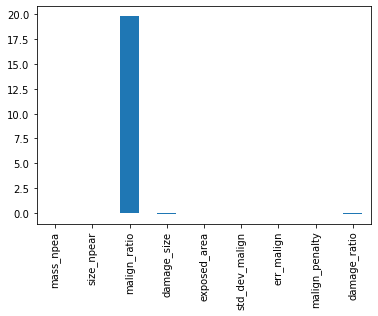

In [38]:
run_melanoma_tumor_pred_model(model,train_X,train_y,test_X,sample,"test_result_melanoma_pred_Linear_Regression.csv")

RMSE of Train Data =  5.145831641910263
Cross validation Score  =  5.1600133002789565


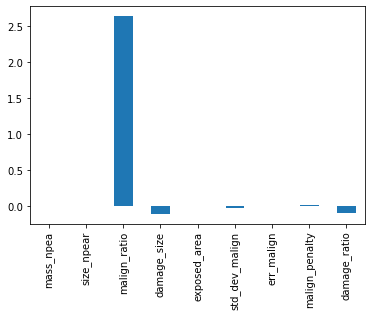

In [39]:
model = Ridge(alpha = 30)
run_melanoma_tumor_pred_model(model,train_X,train_y,test_X,sample,"test_result_melanoma_pred_Ridge_Regression.csv")

RMSE of Train Data =  5.434439103443662
Cross validation Score  =  5.437289511874996


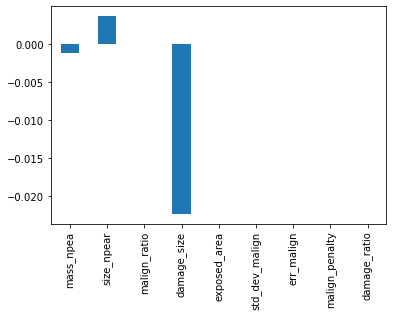

In [40]:
model = Lasso(alpha = 30)
run_melanoma_tumor_pred_model(model,train_X,train_y,test_X,sample,"test_result_melanoma_pred_Lasso_Regression.csv")

RMSE of Train Data =  5.155414182340672
Cross validation Score  =  5.167645564616319


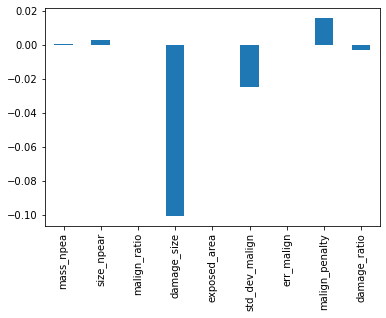

In [41]:
model = ElasticNet (alpha = 1, l1_ratio = 0.5)
run_melanoma_tumor_pred_model(model,train_X,train_y,test_X,sample,"test_result_melanoma_pred_ElasticNet_Regression.csv")

In [42]:
model = LogisticRegression()

In [43]:
def metric_res(acctual, pred,p, a,mc):
    print("confusion_matrix ", confusion_matrix(acctual, pred))
    print("accuracy_score ", accuracy_score(acctual, pred))
    print("recall_score", recall_score(acctual, pred,pos_label = f'{p}',average= f'{a}'))
    print("precision_score ", precision_score(acctual, pred,pos_label = f'{p}',average= f'{a}'))
    print("f1_score", f1_score(acctual, pred, average = f'{a}'))
    print("roc_auc_score", roc_auc_score(np.array(acctual).reshape(-1,1), np.array(pred).reshape(-1,1),average = f'{a}',multi_class = f'{mc}'))
    print("classification report \n", classification_report(acctual, pred))

In [45]:
lab_enc = preprocessing.LabelEncoder()

In [46]:
encoded = lab_enc.fit_transform(train_y)

In [47]:
encoded

array([4832, 1385,  632, ...,  869, 5884, 4832], dtype=int64)

In [49]:
model.fit(train_X,np.array(encoded).reshape(-1,1))

LogisticRegression()

In [50]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [51]:
train_pred

array([5369, 1093,  896, ...,  896,    0,  896], dtype=int64)

In [52]:
train_X.shape

(9146, 9)

In [53]:
test_X.shape

(36584, 9)

In [54]:
train_y

0       14.103
1        2.648
2        1.688
3        3.796
4       18.023
         ...  
9141    13.127
9142    17.091
9143     1.971
9144    17.749
9145    14.103
Name: tumor_size, Length: 9146, dtype: float64

In [56]:
roc_auc_score(encoded,train_pred, multi_class = "ovr")

AxisError: axis 1 is out of bounds for array of dimension 1

In [58]:
metric_res(encoded,train_pred,'positive','micro','ovr')

confusion_matrix  [[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
accuracy_score  0.0022960857205335666
recall_score 0.0022960857205335666
precision_score  0.0022960857205335666
f1_score 0.0022960857205335666


ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [59]:
train_X,test_X,train_y,test_y = train_test_split(train_X,train_y,test_size = 0.2)

In [60]:
train_X

mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
2046    7966.98     2150.22       0.26989      91.5829  1.123281e+06   
4969   10865.90     3923.07       0.36104     117.4020  1.518480e+06   
6427    4873.08     1375.32       0.28222      46.2439  6.808250e+05   
1238    5688.54     1999.65       0.35152      50.5134  8.105682e+05   
3535   10103.70     3108.94       0.30770      98.8726  1.403698e+06   
...         ...         ...           ...          ...           ...   
3159    6512.73      957.96       0.14709      58.7149  8.948699e+05   
180     6007.96     1440.08       0.23969      32.1475  8.582125e+05   
8421   11780.70     2938.22       0.24940     151.9020  1.623238e+06   
2387   16604.00     5039.02       0.30348     179.5630  2.381082e+06   
671    12115.50     3661.77       0.30223     151.3990  1.687303e+06   

      std_dev_malign  err_malign  malign_penalty  damage_ratio  
2046        110.4970     3534.91              97       36.9985  
4969        153.4430     4907.97              74       30.2116  
6427         56.7995     1813.88              22       43.7357  
1238         73.0030     2358.97              25       41.8974  
3535        134.9760     3608.18              20       35.6746  
...              ...         ...             ...           ...  
3159         78.1664     2664.41              45       40.4238  
180          76.7767     2448.92              56       42.8518  
8421        189.9100     4232.83              54       31.5518  
2387        242.0760     5508.31             217       22.0768  
671         161.7150     5013.30              39       28.5244  

[7316 rows x 9 columns]

In [61]:
test_X

mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
5155   13436.00     3018.42       0.22465     139.5930  1.881973e+06   
4069    4107.16     1304.61       0.31764      34.9403  5.660747e+05   
5007    9924.53     3459.91       0.34862      89.9900  1.428712e+06   
613     7477.19     3078.82       0.41176      50.5516  1.046157e+06   
1992    7617.06     2777.63       0.36465      69.5557  1.058432e+06   
...         ...         ...           ...          ...           ...   
4066    7933.03     2300.13       0.28994      71.9316  1.095168e+06   
7108    6877.19     2723.13       0.39596      66.8587  9.350524e+05   
2462    8014.21     1692.20       0.21114      76.7985  1.148418e+06   
176     6492.38     1474.58       0.22712      54.0259  8.459632e+05   
8607    6431.05     1924.17       0.29919      64.6697  8.494717e+05   

      std_dev_malign  err_malign  malign_penalty  damage_ratio  
5155        158.8510     4383.61              76       31.1126  
4069         51.2032     1400.58              17       44.2679  
5007        144.3320     3666.71              13       34.7347  
613         131.1340     2852.05              69       39.1680  
1992        107.0600     3384.59              71       38.9671  
...              ...         ...             ...           ...  
4066         95.1785     3380.49              66       37.7383  
7108        108.2740     3197.89              51       39.0373  
2462        109.1090     4035.56             104       34.9181  
176          78.8510     2840.44              30       39.0469  
8607         90.2410     3373.55              59       39.1137  

[1830 rows x 9 columns]

In [62]:
train_y

2046     1.894
4969    17.594
6427     2.931
1238     3.689
3535     3.028
         ...  
3159    14.886
180     10.678
8421     2.000
2387    19.912
671      4.187
Name: tumor_size, Length: 7316, dtype: float64

In [63]:
test_y

5155     3.910
4069     1.525
5007     4.179
613     12.252
1992    16.596
         ...  
4066    11.496
7108    15.451
2462     0.952
176     18.551
8607     5.179
Name: tumor_size, Length: 1830, dtype: float64

In [64]:
train_scale = StandardScaler(train_X)
test_scale = StandardScaler(test_X)

In [65]:
#sample = pd.read_csv("sample_submission.csv")
def KNN_predicts(train, test,y_train,y_test,scaler,neighbours, metric ='manhattan', weights = 'uniform'):
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    KNN = KNeighborsClassifier(n_neighbors = neighbours,metric = metric,weights = weights,n_jobs= 4)
    KNN.fit(train_scaled,y_train)
    predictions = KNN.predict(test_scaled)
    #sample["tumor_size"] = predictions.astype('int')

    
    print("Accuracy: ",accuracy_score(y_test,predictions))
    print('-'*100)
    #sample.to_csv(filename, index = False)
    return KNN

In [66]:
KNN_predicts(train_X, test_X, train_y.astype('int'),test_y.astype('int'),StandardScaler(), 1)

Accuracy:  0.3584699453551913
----------------------------------------------------------------------------------------------------


KNeighborsClassifier(metric='manhattan', n_jobs=4, n_neighbors=1)

In [67]:
KNN = KNeighborsClassifier(n_neighbors = 1,metric = 'manhattan',weights = 'uniform',n_jobs= 4)

In [68]:
train_X.shape

(7316, 9)

In [69]:
train_y.shape

(7316,)

In [70]:
KNN.fit(train_X,train_y.astype('int'))

KNeighborsClassifier(metric='manhattan', n_jobs=4, n_neighbors=1)

In [71]:
test_X.shape

(1830, 9)

In [72]:
predictions1 = KNN.predict(test_X)

In [73]:
predictions1

array([ 1,  3, 14, ...,  1,  9,  5])

In [74]:
predictions1.shape

(1830,)

In [75]:
predictions1 = pd.DataFrame(predictions1)

In [76]:
predictions1["tumor_size"] = predictions1

In [77]:
del predictions1[0]

In [78]:
predictions1

tumor_size
0              1
1              3
2             14
3              4
4             16
...          ...
1825          15
1826          10
1827           1
1828           9
1829           5

[1830 rows x 1 columns]

In [79]:
predictions1.to_csv("test_result_melanoma_pred_KNN_Algorithm.csv", index = False)

In [80]:
for k in range(1,11):
    print('Accuracy score on kNN using n_neighbours = {0}:'.format(2**k), end = ' ')
    KNN_predicts(train_X, test_X, train_y.astype('int'), test_y.astype('int'), StandardScaler(), 2**k)

Accuracy score on kNN using n_neighbours = 2: Accuracy:  0.33224043715846996
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 4: Accuracy:  0.33934426229508197
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 8: Accuracy:  0.3300546448087432
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 16: Accuracy:  0.32131147540983607
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 32: Accuracy:  0.29562841530054645
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 64: Accuracy:  0.2617486338797814
--------------------------------

In [81]:
for weights in ['uniform','distance']:
    print('Accuracy score on kNN using n_neighbours = {0}:'.format(weights), end = ' ')
    KNN_predicts(train_X, test_X, train_y.astype('int'), test_y.astype('int'), StandardScaler(),5,metric ='chebyshev',weights = weights)

Accuracy score on kNN using n_neighbours = uniform: Accuracy:  0.3092896174863388
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = distance: Accuracy:  0.3355191256830601
----------------------------------------------------------------------------------------------------


# Feature Engineering

In [82]:
def create_poly(train_X,test_X, degree):
    poly = PolynomialFeatures(degree = degree)
    train_poly = poly.fit_transform(train_X)
    test_poly = poly.fit_transform(test_X)
    return train_poly, test_poly

In [83]:
for degree in [1,2,3]:
    train_poly,test_poly = create_poly(train_X,test_X,degree)
    print('Polynomial degree',degree)
    Knn = KNN_predicts(train_poly,test_poly,train_y.astype('int'),test_y.astype('int'),StandardScaler(),5,metric ='chebyshev',weights = 'distance')
    print('-'*100)

Polynomial degree 1
Accuracy:  0.3355191256830601
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Polynomial degree 2
Accuracy:  0.34918032786885245
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Polynomial degree 3
Accuracy:  0.3475409836065574
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [84]:
for degree in [1,2,3]:
    train_poly,test_poly = create_poly(train_X,test_X,degree)
    print('Polynomial degree',degree)
    Knn = KNN_predicts(train_poly,test_poly,train_y.astype('int'),test_y.astype('int'),StandardScaler(),1,metric ='chebyshev',weights = 'distance')
    print('-'*100)

Polynomial degree 1
Accuracy:  0.319672131147541
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Polynomial degree 2
Accuracy:  0.3284153005464481
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Polynomial degree 3
Accuracy:  0.32786885245901637
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [85]:
train_poly[1]

array([1.00000000e+00, 1.08659000e+04, 3.92307000e+03, 3.61040000e-01,
       1.17402000e+02, 1.51847964e+06, 1.53443000e+02, 4.90797000e+03,
       7.40000000e+01, 3.02116000e+01, 1.18067783e+08, 4.26276863e+07,
       3.92302454e+03, 1.27567839e+06, 1.64996479e+10, 1.66729629e+06,
       5.33295112e+07, 8.04076600e+05, 3.28276224e+05, 1.53904782e+07,
       1.41638519e+03, 4.60576264e+05, 5.95710192e+09, 6.01967630e+05,
       1.92543099e+07, 2.90307180e+05, 1.18522222e+05, 1.30349882e-01,
       4.23868181e+01, 5.48231889e+05, 5.53990607e+01, 1.77197349e+03,
       2.67169600e+01, 1.09075961e+01, 1.37832296e+04, 1.78272547e+08,
       1.80145151e+04, 5.76205494e+05, 8.68774800e+03, 3.54690226e+03,
       2.30578041e+12, 2.33000071e+08, 7.45265251e+09, 1.12367493e+08,
       4.58756995e+07, 2.35447542e+04, 7.53093641e+05, 1.13547820e+04,
       4.63575854e+03, 2.40881695e+07, 3.63189780e+05, 1.48277626e+05,
       5.47600000e+03, 2.23565840e+03, 9.12740775e+02, 1.28291272e+12,
      

In [86]:
test_poly

array([[1.00000000e+00, 1.34360000e+04, 3.01842000e+03, ...,
        1.79706378e+05, 7.35675348e+04, 3.01168064e+04],
       [1.00000000e+00, 4.10716000e+03, 1.30461000e+03, ...,
        1.27934231e+04, 3.33139985e+04, 8.67494561e+04],
       [1.00000000e+00, 9.92453000e+03, 3.45991000e+03, ...,
        5.87016430e+03, 1.56844920e+04, 4.19073942e+04],
       ...,
       [1.00000000e+00, 8.01421000e+03, 1.69220000e+03, ...,
        3.77674170e+05, 1.26804466e+05, 4.25747212e+04],
       [1.00000000e+00, 6.49238000e+03, 1.47458000e+03, ...,
        3.51422100e+04, 4.57398120e+04, 5.95332622e+04],
       [1.00000000e+00, 6.43105000e+03, 1.92417000e+03, ...,
        1.36154790e+05, 9.02630101e+04, 5.98393271e+04]])

In [87]:
Knn = KNN_predicts(train_poly,test_poly,train_y.astype('int'),test_y.astype('int'),StandardScaler(),5,metric ='chebyshev',weights = 'distance')

Accuracy:  0.3475409836065574
----------------------------------------------------------------------------------------------------


In [88]:
KNN_predicts(train_X, test_X, train_y.astype('int'),test_y.astype('int'),StandardScaler(), 1)

Accuracy:  0.3584699453551913
----------------------------------------------------------------------------------------------------


KNeighborsClassifier(metric='manhattan', n_jobs=4, n_neighbors=1)

In [89]:
Knn

KNeighborsClassifier(metric='chebyshev', n_jobs=4, weights='distance')

In [90]:
encoded

array([4832, 1385,  632, ...,  869, 5884, 4832], dtype=int64)

In [91]:
test_pred

array([896, 301, 497, ..., 766, 896,   0], dtype=int64)

In [92]:
pandas_profiling.ProfileReport(train)

# Gradient Boost and Random Forest

In [93]:
def run_model_validate(model, train_X, test_X, train_y, test_y, ave):
  model.fit(train_X, train_y)
  pred_train = model.predict(train_X)
  pred_test = model.predict(test_X)

  print("Train Accuracy : ",accuracy_score(train_y, pred_train))
  print("Test Accuracy : ",accuracy_score(test_y, pred_test))

  print("Train F1 Score : ",f1_score(train_y, pred_train, average = ave))
  print("Test F1 Score : ",f1_score(test_y, pred_test, average = ave))

  print("Train Confusion Matrix : ",confusion_matrix(train_y, pred_train))
  print("Test Confusion Matrix : ",confusion_matrix(test_y, pred_test))

  print("Train Classification Report : ",classification_report(train_y, pred_train))
  print("Test Classification Report : ",classification_report(test_y, pred_test))

  return model, accuracy_score(test_y, pred_test), f1_score(test_y, pred_test, average = ave)

In [94]:
model = LogisticRegression(max_iter= 1000)
model_name, accuracy, f1score = run_model_validate(model, train_X, test_X, train_y.astype('int'), test_y.astype('int'), 'micro')

Train Accuracy :  0.1674412247129579
Test Accuracy :  0.15792349726775956
Train F1 Score :  0.1674412247129579
Test F1 Score :  0.15792349726775956
Train Confusion Matrix :  [[  0 178  79   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1
    2   0   0]
 [  0 561 531   7   0   0   0   0   0   0   0   0   0   0   0   4   2   5
    0   9   0]
 [  0 508 595   2   0   0   0   0   0   0   0   0   0   0   0   8   1  10
    8   8   0]
 [  0 242 407   1   0   0   0   0   0   0   0   0   0   0   0   5   1  20
    3   3   0]
 [  0 134 278   1   0   0   0   0   0   0   0   0   0   0   0   5   0   6
    9   3   0]
 [  0  70 168   0   0   0   0   0   0   0   0   0   0   0   0   4   0   5
    6   2   0]
 [  1  54 129   0   0   0   0   0   0   0   0   0   0   0   0   3   0   5
   11   4   0]
 [  0  53 105   0   0   0   0   0   0   0   0   0   0   0   0   2   0   9
    4   1   0]
 [  0  69 113   0   0   0   0   0   0   0   0   0   0   0   0   1   0   9
    5   3   0]
 [  0  62 113   0   0   0

In [95]:
model = [LogisticRegression(penalty = 'none'), LogisticRegression(solver = 'liblinear',penalty='l1'), LogisticRegression(penalty='l2'), 
        LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet'),
         KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

result = []
for i in model:
  model_name, accuracy, f1score = run_model_validate(i, train_X, test_X, train_y.astype('int'), test_y.astype('int'), 'micro')
  result.append([model_name, accuracy, f1score])

Train Accuracy :  0.17181519956260252
Test Accuracy :  0.16010928961748633
Train F1 Score :  0.17181519956260252
Test F1 Score :  0.16010928961748633
Train Confusion Matrix :  [[  0 195  59   5   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    1   0   0]
 [  0 608 436  66   1   0   0   0   0   0   0   0   0   0   4   1   0   1
    1   1   0]
 [  0 536 532  53   3   0   0   0   0   0   0   0   0   0   4   4   0   0
    8   0   0]
 [  0 257 357  43   0   0   0   0   0   0   0   0   0   1   6   9   0   3
    6   0   0]
 [  0 135 248  35   0   0   0   0   0   0   0   0   0   0   3   3   0   1
   10   1   0]
 [  0  80 140  19   1   0   0   0   0   0   0   0   0   0   4   3   0   0
    8   0   0]
 [  0  63 110  14   1   0   0   0   0   0   0   0   0   0   2   3   0   1
   13   0   0]
 [  0  54  79  27   2   0   0   0   0   0   0   0   0   0   2   4   0   1
    4   1   0]
 [  0  77  90  18   1   0   0   0   0   0   0   0   0   0   3   0   0   2
    8   1   0]
 [  0  67  91  20   1  

Train Accuracy :  0.17181519956260252
Test Accuracy :  0.16010928961748633
Train F1 Score :  0.17181519956260252
Test F1 Score :  0.16010928961748633
Train Confusion Matrix :  [[  0 195  59   5   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    1   0   0]
 [  0 608 436  66   1   0   0   0   0   0   0   0   0   0   4   1   0   1
    1   1   0]
 [  0 536 532  53   3   0   0   0   0   0   0   0   0   0   4   4   0   0
    8   0   0]
 [  0 257 357  43   0   0   0   0   0   0   0   0   0   1   6   9   0   3
    6   0   0]
 [  0 135 248  35   0   0   0   0   0   0   0   0   0   0   3   3   0   1
   10   1   0]
 [  0  80 140  19   1   0   0   0   0   0   0   0   0   0   4   3   0   0
    8   0   0]
 [  0  63 110  14   1   0   0   0   0   0   0   0   0   0   2   3   0   1
   13   0   0]
 [  0  54  79  27   2   0   0   0   0   0   0   0   0   0   2   4   0   1
    4   1   0]
 [  0  77  90  18   1   0   0   0   0   0   0   0   0   0   3   0   0   2
    8   1   0]
 [  0  67  91  20   1  

Train Accuracy :  0.36235647895024603
Test Accuracy :  0.1448087431693989
Train F1 Score :  0.36235647895024603
Test F1 Score :  0.1448087431693989
Train Confusion Matrix :  [[172  32  25  12   4   1   0   1   1   1   2   2   0   2   1   1   1   0
    2   1   0]
 [ 71 832 103  37  18   3   2   3   2   7   2   6   4   5   5   2   7   3
    3   3   1]
 [ 50 277 673  45  25   6   1   3   6   4   3   8   5   5   4   7   7   1
    4   6   0]
 [ 56 170 138 252  14   5   3   1   1   2   1   3   4   3   4   7   9   6
    2   1   0]
 [ 33 110 100  37 122   3   4   1   1   2   1   3   0   2   4   4   4   0
    1   4   0]
 [ 16  73  69  22  12  41   0   1   1   2   0   3   3   4   2   2   1   0
    1   1   1]
 [ 16  51  50  22  10   5  29   0   2   3   1   3   4   1   2   0   3   1
    3   0   1]
 [ 12  41  34  11  10   7   2  36   1   0   0   3   3   3   5   0   2   2
    2   0   0]
 [ 11  63  44   9   9   2   5   4  30   1   3   3   1   4   6   0   3   0
    0   2   0]
 [ 13  57  35  16   6   3

Test Classification Report :                precision    recall  f1-score   support

           0       0.56      0.57      0.56        67
           1       0.52      0.52      0.52       266
           2       0.43      0.41      0.42       279
           3       0.25      0.29      0.27       171
           4       0.18      0.20      0.19       127
           5       0.13      0.09      0.11        85
           6       0.15      0.16      0.15        51
           7       0.02      0.02      0.02        45
           8       0.22      0.25      0.23        56
           9       0.08      0.09      0.09        43
          10       0.10      0.11      0.11        53
          11       0.24      0.16      0.19        73
          12       0.08      0.06      0.07        66
          13       0.15      0.18      0.16        71
          14       0.10      0.10      0.10        71
          15       0.16      0.20      0.18        71
          16       0.14      0.13      0.13        

Train Accuracy :  0.18972115910333515
Test Accuracy :  0.16885245901639345
Train F1 Score :  0.18972115910333515
Test F1 Score :  0.16885245901639345
Train Confusion Matrix :  [[ 70  83  70  20   0   0   8   0   0   0   0   5   0   0   0   0   0   0
    5   0   0]
 [116 361 385  60   1   0   9   3   4   0   0 113   0  20  12   0   6   0
   20   9   0]
 [105 252 561  53   3   0   4   2   4   0   0  74   0  23   9   0   2   0
   22  25   1]
 [ 37 116 314  76   0   2   3   4   0   0   2  46   0  30  13   0   3   0
   22  13   1]
 [ 21  82 163  54   2   0   2   3   1   0   0  32   0  22  12   1   1   1
   18  19   2]
 [  9  41  91  32   2   0   3   6   0   0   0  17   0  11  11   1   0   0
   15  15   1]
 [  9  39  63  23   1   0   9   1   1   0   0  14   0   9   9   0   1   0
   10  16   2]
 [  8  33  32  10   2   3   1   4   0   0   1  49   0   7   6   0   0   0
    4  14   0]
 [ 12  54  38   7   1   0   5   2   0   0   0  33   0  12  10   2   1   2
    7  12   2]
 [ 11  55  40   7   1  

In [96]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()


estimators = []
estimators.append(('GBM', model1))
estimators.append(('RF', model2))

voting_model = VotingClassifier(estimators)

In [97]:
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, test_X, train_y.astype('int'), test_y.astype('int'),'micro')
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.7439857845817387
Test Accuracy :  0.33278688524590166
Train F1 Score :  0.7439857845817387
Test F1 Score :  0.33278688524590166
Train Confusion Matrix :  [[ 261    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   8 1111    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3  204  933    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   2   80  209  391    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0   67  103   35  231    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0   29   43   18   13  152    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0   36   21   13    5    1  131    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   1   17   13    2    2    1    1  137    0    0    0

In [98]:
voting_model = VotingClassifier(estimators, voting = 'soft')
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, test_X, train_y.astype('int'), test_y.astype('int'),'micro')
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.9946692181519956
Test Accuracy :  0.3622950819672131
Train F1 Score :  0.9946692181519956
Test F1 Score :  0.3622950819672131
Train Confusion Matrix :  [[ 255    6    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   1 1115    3    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    6 1132    2    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    3    5  674    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    1    0  435    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0  255    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  207    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  174    0    0    0  

In [99]:
pd.DataFrame(result, columns = ["Model","Accuracy","F1 Score"])

Model  Accuracy  F1 Score
0                  LogisticRegression(penalty='none')  0.160109  0.160109
1   LogisticRegression(penalty='l1', solver='libli...  0.181421  0.181421
2                                LogisticRegression()  0.160109  0.160109
3   LogisticRegression(l1_ratio=0.5, penalty='elas...  0.152459  0.152459
4                              KNeighborsClassifier()  0.144809  0.144809
5                            DecisionTreeClassifier()  0.265574  0.265574
6   (DecisionTreeClassifier(max_features='auto', r...  0.385792  0.385792
7   (DecisionTreeClassifier(max_depth=1, random_st...  0.168852  0.168852
8   ([DecisionTreeRegressor(criterion='friedman_ms...  0.276503  0.276503
9   VotingClassifier(estimators=[('GBM', GradientB...  0.332787  0.332787
10  VotingClassifier(estimators=[('GBM', GradientB...  0.362295  0.362295

In [ ]:
result

In [100]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = LogisticRegression(solver = 'liblinear',penalty='l1')

In [132]:
estimators = [('GBM', GradientBoostingClassifier()),
              ('RF', RandomForestClassifier()),
              ('LR', LogisticRegression(solver = 'liblinear',penalty='l1'))]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [131]:
# For Train Data 

import warnings
warnings.simplefilter('ignore')

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression(solver = 'liblinear',penalty='l1')

lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[clf1,clf2,clf3], meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['GBM', 
                       'Random Forest', 
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X, y, cv=3)
    #print(scores)
    print("Accuracy: %0.7f (+/- %0.7f) [%s]" 
          % (np.mean(scores), np.std(scores), label))

3-fold cross validation:

Accuracy: nan (+/- nan) [GBM]
Accuracy: nan (+/- nan) [Random Forest]
Accuracy: nan (+/- nan) [Logistic Regression]
Accuracy: nan (+/- nan) [StackingClassifier]


In [127]:
# For Test Data 

import warnings
warnings.simplefilter('ignore')

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression(solver = 'liblinear',penalty='l1')

lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[clf1,clf2,clf3], 
                         meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['GBM', 
                       'Random Forest', 
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = cross_val_score(clf, test_X, test_y, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: nan (+/- nan) [GBM]
Accuracy: nan (+/- nan) [Random Forest]
Accuracy: nan (+/- nan) [Logistic Regression]
Accuracy: nan (+/- nan) [StackingClassifier]


In [112]:
import os

In [113]:
os.getcwd() 

'C:\\Users\\dell\\Documents\\AI-ML(Data Science Program)\\Hackathon Contest (12-DEC-2020, Saturday & Sunday)\\Melanoma Pred (Hack 2)'

In [136]:
model_name, accuracy, f1score = run_model_validate(clf, train_X, test_X, train_y.astype('int'), test_y.astype('int'), 'micro')
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.9838709677419355
Test Accuracy :  0.3808743169398907
Train F1 Score :  0.9838709677419355
Test F1 Score :  0.3808743169398907
Train Confusion Matrix :  [[ 261    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0 1119    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0 1140    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0  682    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0  436    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0  255    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  207    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  174    0    0    0  

In [137]:
final_result = pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

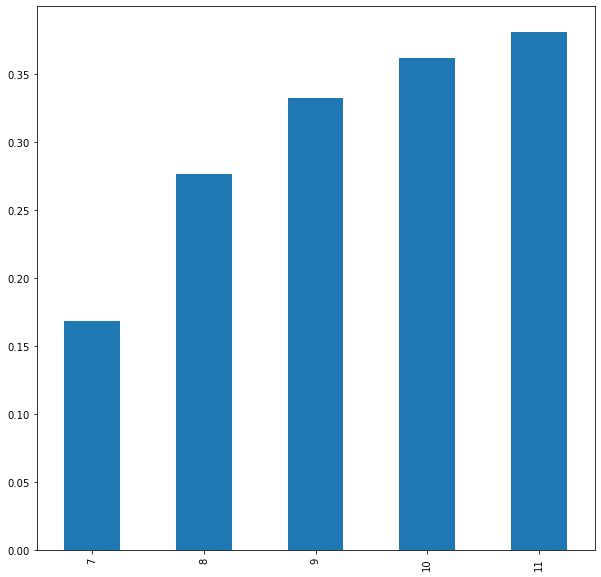

In [140]:
final_result["Accuracy"].tail().plot(kind = "bar", figsize = (10,10))